# Import  libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
import json
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from datetime import timedelta
from scipy.stats import pearsonr
from scipy import stats
import time
!pip install vaex
import vaex


In [2]:
zip_path = r'C:\Users\USER\Desktop\Courses-Sapienza\ADM ( algorithm method and datamining )\note and homework\assigment2\archive.zip'
json_path1 = 'books.json/books.json'
json_path2 = 'authors.json/authors.json'

json_path3 = 'list.json/list.json'

# reading data from a Zip file

In [3]:

l = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:   
    with zip_ref.open(json_path2, 'r') as file:
        for line in file:
            # Process each line (which represents a JSON object)
            data = json.loads(line)
            l.append(data)
            
            if len(l) > 100000:
                break

# Create DataFrame from the entire list of JSON data
df_author = pd.DataFrame(l)


In [145]:

l = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:   
    with zip_ref.open(json_path1, 'r') as file:
        for line in file:
            # Process each line (which represents a JSON object)
            data = json.loads(line)
            l.append(data)
            
            if len(l) > 100000:
                break

# Create DataFrame from the entire list of JSON data
df_book = pd.DataFrame(l)

# 1 -[RQ1]

In [8]:
df_book.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,NaN,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


In [9]:
df_book.columns


Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')

In [10]:
df_author.columns

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

# Rating dist of Authors

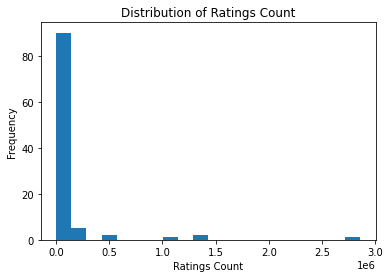

In [11]:
plt.hist(df_author['ratings_count'], bins=20)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()

# average rating box_plot Authors

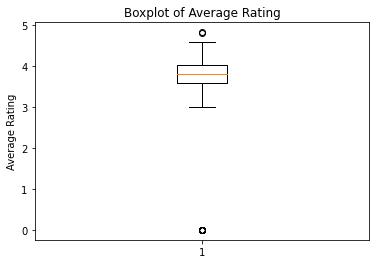

In [12]:
plt.boxplot(df_author['average_rating'])
plt.title('Boxplot of Average Rating')
plt.ylabel('Average Rating')
plt.show()


# Text Review by gender

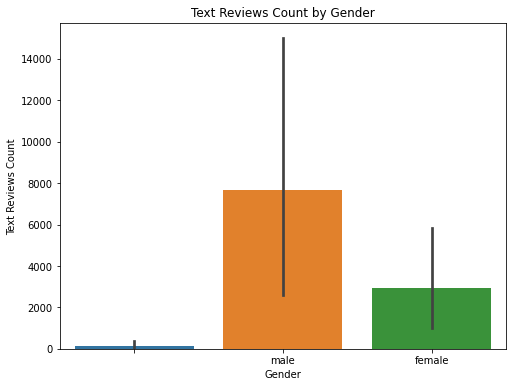

In [13]:

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='text_reviews_count', data=df_author)
plt.title('Text Reviews Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Text Reviews Count')
plt.show()

# Number of Fans of each author by Gender 

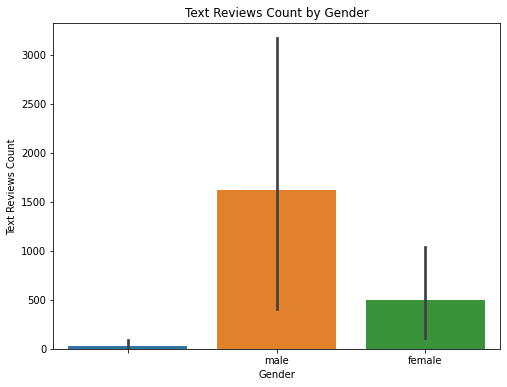

In [14]:

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='fans_count', data=df_author)
plt.title('Text Reviews Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Text Reviews Count')
plt.show()

# Relationship Between textreview count and rating count

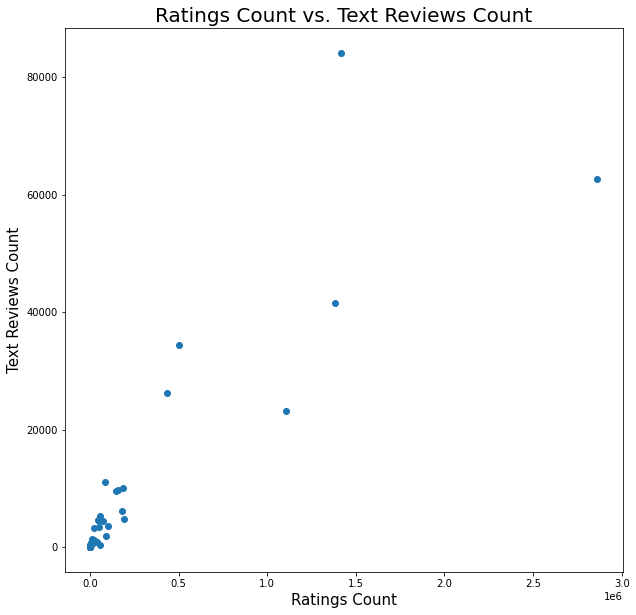

In [15]:
plt.figure(figsize = (10, 10))

plt.scatter(df_author['ratings_count'], df_author['text_reviews_count'])
plt.title('Ratings Count vs. Text Reviews Count' , fontdict = {'size' : 20})
plt.xlabel('Ratings Count' , fontdict = {'size' : 15})
plt.ylabel('Text Reviews Count' , fontdict = {'size' : 15})
plt.show()

# Hist of number of books published by one authors

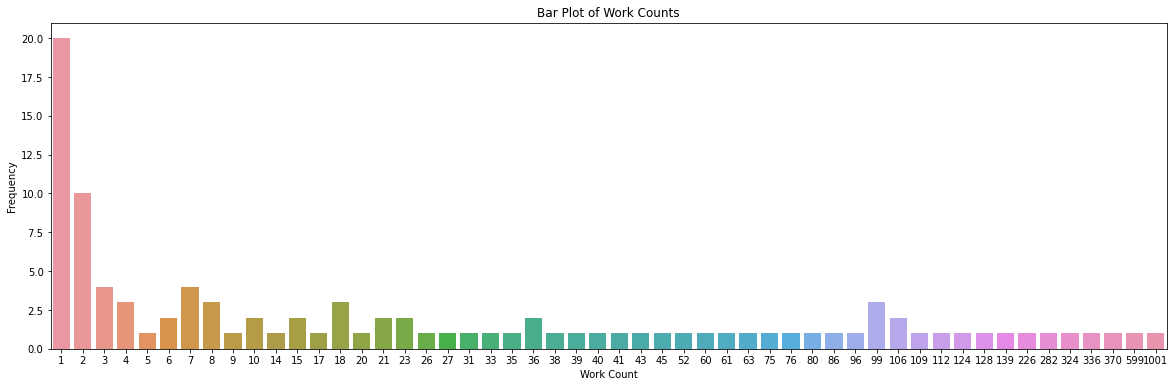

In [16]:
plt.figure(figsize=(20, 6))
work_counts = df_author['works_count'].value_counts().reset_index()
work_counts.columns = ['Work Count', 'Frequency']
sns.barplot(x='Work Count', y='Frequency', data=work_counts)
plt.title('Bar Plot of Work Counts')
plt.xlabel('Work Count')
plt.ylabel('Frequency')
plt.show()

# working with book data

In [17]:
df_book.describe()

,average_rating,ratings_count,text_reviews_count
count,101.000000,1.010000e+02,101.000000
mean,4.037723,3.207753e+05,6378.861386
std,0.374585,9.522260e+05,16178.948973
min,2.850000,4.000000e+00,0.000000
25%,3.800000,2.110000e+02,19.000000
50%,3.930000,2.826000e+03,173.000000
75%,4.360000,9.366300e+04,3324.000000
max,4.790000,7.377351e+06,116930.000000


In [18]:
df_book.columns

Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')

In [19]:
df_book.dtypes

id                            object
title                         object
authors                       object
author_name                   object
author_id                     object
work_id                       object
isbn                          object
isbn13                        object
asin                          object
language                      object
average_rating               float64
rating_dist                   object
ratings_count                  int64
text_reviews_count             int64
publication_date              object
original_publication_date     object
format                        object
edition_information           object
image_url                     object
publisher                     object
num_pages                     object
series_id                     object
series_name                   object
series_position               object
shelves                       object
description                   object
dtype: object

### Avg rating box plot with different language

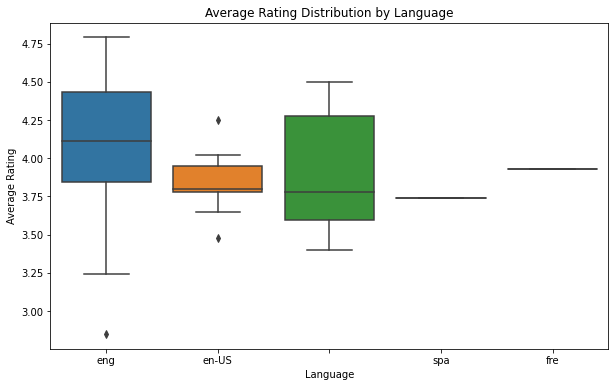

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='average_rating', data=df_book)
plt.title('Average Rating Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.show()

### number of pages for each format in a barplot

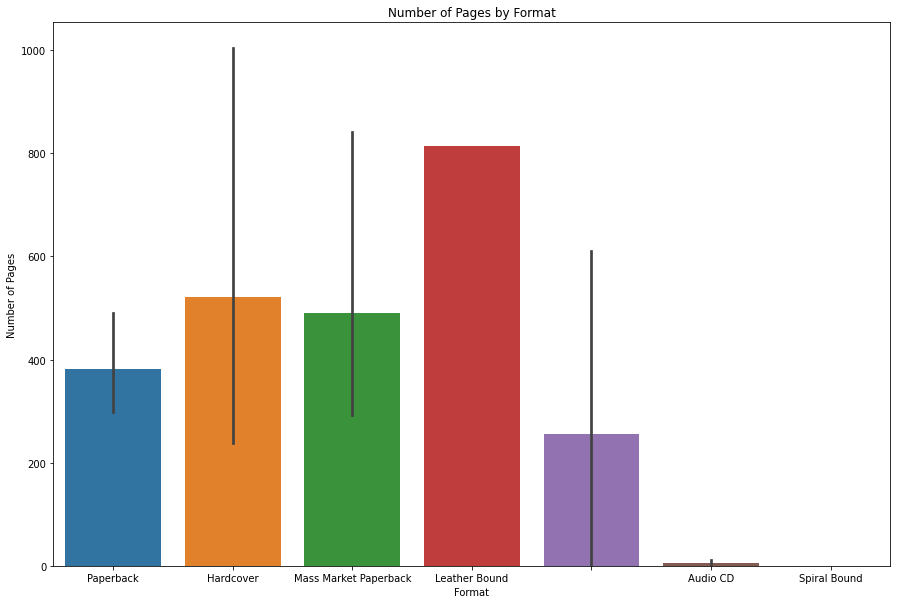

In [21]:
# Convert 'num_pages' to numeric, setting errors='coerce' to convert non-convertible values to NaN
df_book['num_pages'] = pd.to_numeric(df_book['num_pages'], errors='coerce')

# Replace NaN values with a default value (e.g., 0)
df_book['num_pages'].fillna(0, inplace=True)

# Convert the column to integer
df_book['num_pages'] = df_book['num_pages'].astype(int)


plt.figure(figsize = (15, 10))
sns.barplot(x='format', y='num_pages', data=df_book)
plt.title('Number of Pages by Format')
plt.xlabel('Format')
plt.ylabel('Number of Pages')
plt.show()

### Number of Books Published yeach year

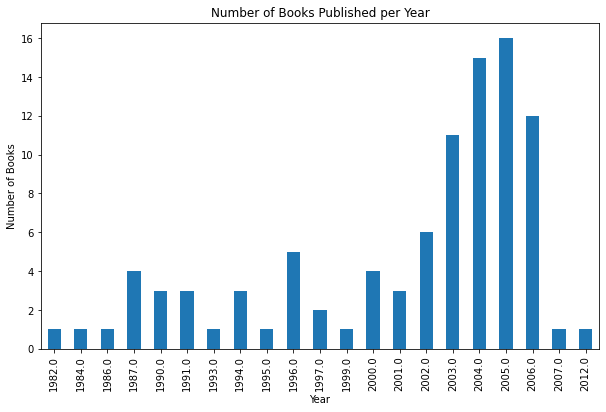

In [22]:
df_book['publication_year'] = pd.to_datetime(df_book['publication_date']).dt.year

plt.figure(figsize=(10, 6))

df_book['publication_year'].value_counts().sort_index().plot(kind='bar')

plt.title('Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

### average rating in each year

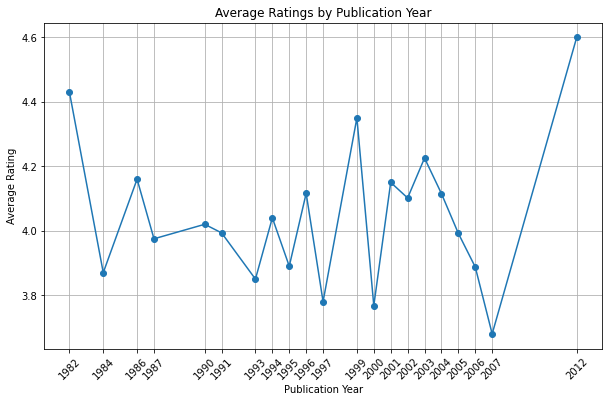

In [23]:

# Convert 'publication_date' to datetime if it's not already in datetime format
df_book['publication_date'] = pd.to_datetime(df_book['publication_date'])

# Extract the year from 'publication_date' and create a new column 'publication_year'
df_book['publication_year'] = df_book['publication_date'].dt.year

# Group by 'publication_year' and calculate the mean of 'average_rating' for each year
avg_rating_by_year = df_book.groupby('publication_year')['average_rating'].mean().reset_index()

# Sort the data by publication year (optional but can be helpful for a clearer visualization)
avg_rating_by_year = avg_rating_by_year.sort_values(by='publication_year')

# Visualization - Line plot of average ratings by publication year
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_year['publication_year'], avg_rating_by_year['average_rating'], marker='o')
plt.title('Average Ratings by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.xticks(avg_rating_by_year['publication_year'], rotation=45)  # Rotate x-labels for better readability
plt.grid(True)
plt.show()


### Average Number of Ages by different years

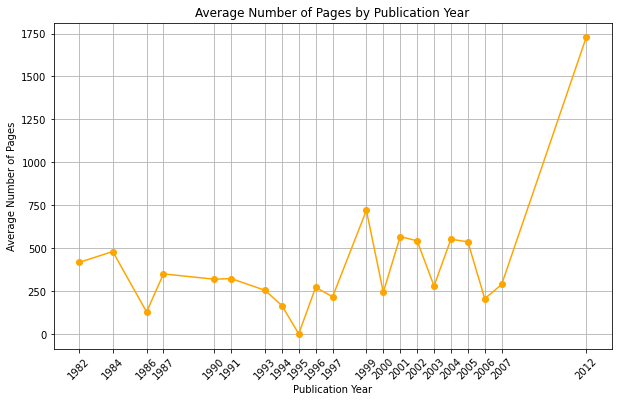

In [24]:


# Convert 'publication_date' to datetime if it's not already in datetime format
df_book['publication_date'] = pd.to_datetime(df_book['publication_date'])

# Extract the year from 'publication_date' and create a new column 'publication_year'
df_book['publication_year'] = df_book['publication_date'].dt.year

# Group by 'publication_year' and calculate the mean of 'num_pages' for each year
avg_pages_by_year = df_book.groupby('publication_year')['num_pages'].mean().reset_index()

# Sort the data by publication year (optional but can be helpful for a clearer visualization)
avg_pages_by_year = avg_pages_by_year.sort_values(by='publication_year')

# Visualization - Line plot of average number of pages by publication year
plt.figure(figsize=(10, 6))
plt.plot(avg_pages_by_year['publication_year'], avg_pages_by_year['num_pages'], marker='o', color='orange')
plt.title('Average Number of Pages by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Number of Pages')
plt.xticks(avg_pages_by_year['publication_year'], rotation=45)  # Rotate x-labels for better readability
plt.grid(True)
plt.show()


# 2 -  [RQ2] 

## 2.1 - Plot the number of books for each author in descending order.

Text(0, 0.5, 'Numb of books')

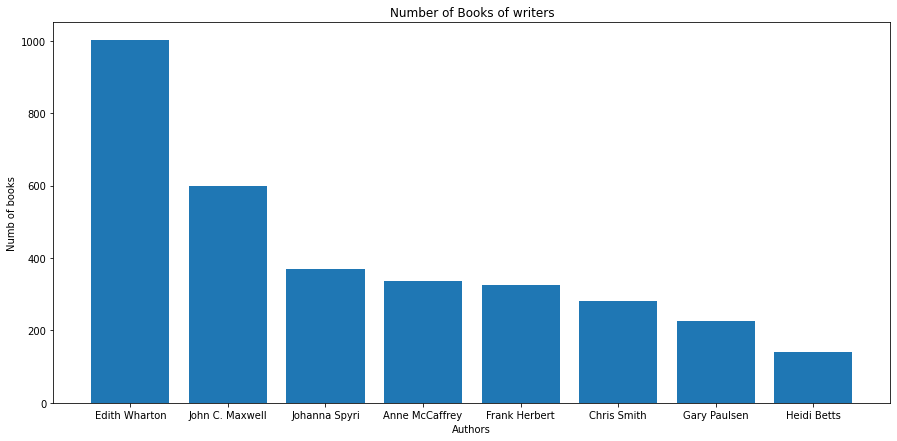

In [25]:
plt.figure(figsize =(15,7))

authors = df_author[['name' , 'works_count']]

authors = authors.sort_values(by = 'works_count' , ascending = False )

authors = authors.iloc[:8 , :]
plt.bar(x = authors['name'] , height = authors['works_count'])

plt.xlabel('Authors')
plt.title('Number of Books of writers')
plt.ylabel('Numb of books')

## 2.2 - Which book has the highest number of reviews?

In [26]:
max_reviews_index = df_book['text_reviews_count'].idxmax()
book_with_highest_reviews = df_book.loc[max_reviews_index]

book_with_highest_reviews['title']

"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"

## 2.3 - Which are the top ten and ten worst books concerning the average score?

In [27]:
df_book.groupby('title')['average_rating'].mean().reset_index().sort_values(by = 'average_rating' ).head(10)

,title,average_rating
56,The Birthdays,2.85
21,Getting Results with Curriculum Mapping,3.24
51,Ruby Quickly: Ruby and Rails for the Real World,3.40
7,Bill Bryson's African Diary,3.45
13,Chasing Jordan,3.45
33,Hatchet Jobs: Writings on Contemporary Fiction,3.48
82,The Secrets of Frank Herbert's Dune,3.57
44,Love Your Handwriting (Creating Keepsakes),3.58
52,Seven-Year Seduction,3.60
86,The Woodsman and His Hatchet: Eighty Years on ...,3.60


In [28]:
df_book.groupby('title')['average_rating'].mean().reset_index().sort_values(by = 'average_rating' , ascending = False).head(10)

,title,average_rating
25,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.790000
63,"The Harry Potter Collection (Harry Potter, #1-6)",4.730000
26,"Harry Potter Collection (Harry Potter, #1-6)",4.730000
42,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.600000
72,The Lord of the Rings,4.586667
76,The Lord of the Rings: Weapons and Warfare,4.580000
30,Harry Potter and the Prisoner of Azkaban (Harr...,4.570000
28,Harry Potter and the Goblet of Fire (Harry Pot...,4.560000
75,The Lord of the Rings: Complete Visual Companion,4.510000
74,The Lord of the Rings Box Set,4.500000


## 2.4 - Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

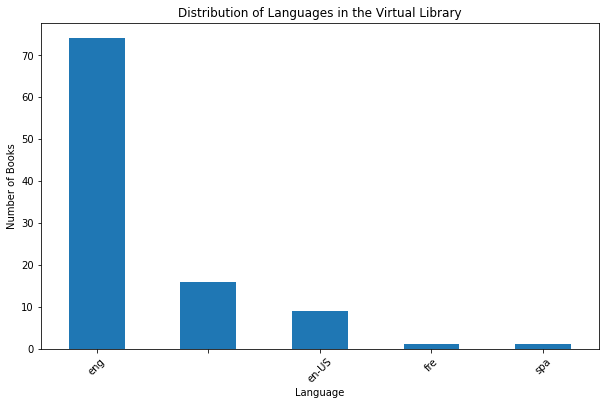

In [29]:
# Count the occurrences of each language
language_counts = df_book['language'].value_counts()

# Plotting the distribution of languages
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Languages in the Virtual Library')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

## 2.5 - How many books have more than 250 pages?

In [30]:
len1 = len(list(df_book[df_book['num_pages'] > 250 ]['title'].unique()))

print('The number of books that have more than 250 pages is : ' , len1)

The number of books that have more than 250 pages is :  50


## 2.6 - Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books)

In [31]:
fans_dist = df_author.groupby(['name' , 'fans_count'])['works_count'].sum().reset_index().sort_values(by = 'works_count' , ascending = False).head(50)

<Figure size 720x432 with 0 Axes>

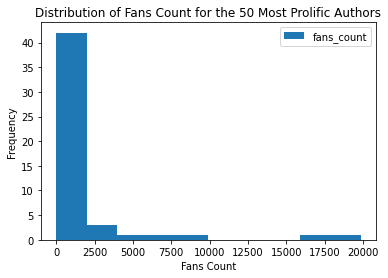

In [32]:
_ = plt.figure(figsize=(10, 6))

fans_dist[['fans_count']].plot(kind = 'hist', bins = 10)

plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.xlabel('Fans Count')
_ =plt.ylabel('Frequency')


# [RQ3] 

Write a function that takes as input a year and returns as output the following information:

* The number of books published that year.

* The total number of pages written that year.

* The most prolific month of that year.

* The longest book written that year.

In [33]:
def cal_inf(year):
    #1
    data = df_book.groupby('publication_year')['title'].count()
    num_of_books = data[year]
    #----------------------------------
    
    #2
    
    data1 = df_book.groupby('publication_year')['num_pages'].sum()
    total_page = data1[year]
    
    #----------------------------------
    
    #3
    df_book['publication_date'] = df_book['publication_date'].astype(str)
    book_data_year = df_book[df_book['publication_date'].str.startswith(str(year))]
    
    book_data_year['month'] = pd.to_datetime(book_data_year['publication_date']).dt.month_name()
    
    month_counts = book_data_year['month'].value_counts()
    
    most_prolific_month = month_counts.idxmax()
    
    #---------------------------------------------------
    #4
    
    df_book['publication_date'] = df_book['publication_date'].astype(str)
    book_data_year = df_book[df_book['publication_date'].str.startswith(str(year))]
    
    longest_book = book_data_year.groupby('title')['num_pages'].max()
    longest = pd.DataFrame(longest_book).sort_values(by = 'num_pages'  , ascending = False).reset_index()['title'][0]
    
     
    result = pd.DataFrame({
        'Year': year,
        'Num_of_books': [num_of_books],
        'Total_pages': total_page,
        'Most_prolific_month': most_prolific_month,
        'Longest_book_title': [longest]})
    
    #print('num of books is : ' , num_of_books )
    #print('total pages is : ' ,total_page) 
    #print('most profilic month is :', most_prolific_month)
    #print('longest book is :',longest)
    
    return result
    
    

# The code implemented by ChatGPT

In [39]:
import pandas as pd

def books_info_by_year(year, df_book):
    # Filtering books for the given year
    books_year = df_book[df_book['publication_date'].astype(str).str.startswith(str(year))]

    # Number of books published in that year
    num_books = books_year.shape[0]

    # Total number of pages written that year
    total_pages = books_year['num_pages'].sum()

    # Extracting the month from publication date
    books_year.loc[:,'publication_date'] = pd.to_datetime(books_year.loc[:,'publication_date'])
    books_year.loc[:,'month'] = books_year.loc[:,'publication_date'].dt.month_name()
    
    # Most prolific month
    most_prolific_month = books_year['month'].value_counts().idxmax()

    # Longest book written in that year
    longest_book = books_year.loc[books_year['num_pages'].idxmax(), 'title']

    return {
        'Year': year,
        'Num_of_books': num_books,
        'Total_pages': total_pages,
        'Most_prolific_month': most_prolific_month,
        'Longest_book_title': longest_book
    }

# Example usage:
# Replace 'df' with the name of your book dataset
result_2022 = books_info_by_year(2005, df_book)
print(result_2022)


{'Year': 2005, 'Num_of_books': 16, 'Total_pages': 8584, 'Most_prolific_month': 'November', 'Longest_book_title': 'Harry Potter Collection (Harry Potter, #1-6)'}


##### Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [35]:
import pandas as pd

# List of years
years_list = [i for i in range(1979 , 2015 , 1)]  # Replace these years with the years you want to analyze

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Year', 'Num_of_books', 'Total_pages', 'Most_prolific_month', 'Longest_book_title'])

# Iterate over the list of years and call the function for each year
for year in years_list:
    
    try:
        result = cal_inf(year)
        results_df = results_df.append(result, ignore_index=True)
        
    except:
        pass

# Display the generated DataFrame
results_df

    

<ipython-input-33-328694d51230>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data_year['month'] = pd.to_datetime(book_data_year['publication_date']).dt.month_name()


,Year,Num_of_books,Total_pages,Most_prolific_month,Longest_book_title
0,1982,1,416,June,"The John McPhee Reader (John McPhee Reader, #1)"
1,1984,1,480,April,"Heretics of Dune (Dune Chronicles, #5)"
2,1986,1,128,April,Heirs of General Practice
3,1987,4,1398,July,Chapterhouse: Dune (Dune #6)
4,1990,3,956,August,"The Changeling (Daughters of England, #15)"
5,1991,3,967,July,Coming Into the Country
6,1993,1,254,March,Neither Here nor There: Travels in Europe
7,1994,3,496,April,Giving Good Weight
8,1995,1,0,July,The Bucaneers
9,1996,5,1358,February,The Ultimate Hitchhiker's Guide (Hitchhiker's ...


#  [RQ4] 

#### 4-1 You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [ ]:
* You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true

In [41]:
# Identify eponymous authors
eponymous_authors = df_author[df_author.duplicated('name', keep=False)]

# Display the eponymous authors
eponymous_authors


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count


#### 4-2 Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [50]:
def get_books_by_author(list_of_author_ids):
    books_by_author = {}
    
    
    df_book['author_id'] = df_book['author_id'].astype(int) #did this to input integer author id insted of string type
    for author_id in list_of_author_ids:
        
        # Filter books for a specific author_id
        author_books = df_book[df_book['author_id'] == author_id]['title'].tolist()
        
        # Store book names related to the author_id
        books_by_author[author_id] = author_books
    
    return books_by_author


get_books_by_author([1077326 , 58])

{1077326: ['Harry Potter and the Order of the Phoenix (Harry Potter, #5)',
  "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
  'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
  'Harry Potter and the Goblet of Fire (Harry Potter, #4)',
  'The Harry Potter Collection (Harry Potter, #1-6)',
  'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
  'Harry Potter Collection (Harry Potter, #1-6)'],
 58: ['God Emperor of Dune (Dune Chronicles, #4)',
  'Dune (Dune Chronicles, #1)',
  'Chapterhouse: Dune (Dune #6)',
  'Dune Messiah (Dune #2)',
  'Heretics of Dune (Dune Chronicles, #5)',
  'The Road to Dune']}

#### 4-3 What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [114]:
best_authors = df_author.sort_values(by = 'average_rating' , ascending = False).head(20)

list_to_store_len_book = []

for id1 in list(best_authors.id.values):
    id1 = int(id1)
    
    title = df_book[df_book['author_id'] == id1]['title'].tolist()
    
    if len(title) != 0:
        for book_name in title:
            #print(book_name,len(book_name) , id1)
            list_to_store_len_book.append([book_name , len(book_name) , id1])
            
final = sorted(list_to_store_len_book , key =  lambda x : x[1] , reverse = True)

    

In [125]:
final = sorted(list_to_store_len_book , key =  lambda x : x[1] , reverse = True)

print('The longest book name among the to top authors is : \n ' , final[0][0] )
print()
print('the len of the title is : ' , final[0][1])

The longest book name among the to top authors is : 
  The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy, #1-5)

the len of the title is :  108


### Is it the longest book title overall?

In [138]:
title_len = [(i , len(i)) for i in df_book['title'].tolist() ]

longest_book_title = sorted(title_len , key = lambda x : x[1] , reverse = True)[0][0]

if longest_book_title == final[0][0]:
    print("longest book title among top 20 authors is the same with longest book title overal")
    
else:
    print('they are different from each other')

longest book title among top 20 authors is the same with longest book title overal


#### 4.4 - What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [159]:
title_len = [(book , len(book)) for book in df_book['title'].tolist() ]

shortest_book_title = sorted(title_len , key = lambda x : x[1] , reverse = False)


"""
it might be because the dataset might contain empty or null book titles. In such cases,
the title with the minimum length might represent an empty or non-informative entry.
An alternative approach to handle this issue would be to clean the dataset, removing or
replacing any null or empty values in the 'title' column, and then reattempting the process 
to find the shortest book title. This cleaning step could involve removing rows
with missing titles or replacing the empty titles with a placeholder to distinguish them from legitimate book titles.
"""
shortest_book_title[0]

('a', 1)

In [105]:
df_authors = pd.read_json('/home/ec2-user/lighter_authors.json', lines=True)
df_authors.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


In [106]:
df_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [107]:
df_books = pd.read_json('/home/ec2-user/lighter_books.json', lines=True, nrows=100000)
df_books.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


In [108]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99984 entries, 0 to 99983
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         99984 non-null  int64  
 1   title                      99984 non-null  object 
 2   authors                    34259 non-null  object 
 3   author_name                99984 non-null  object 
 4   author_id                  99984 non-null  int64  
 5   work_id                    99984 non-null  int64  
 6   isbn                       99984 non-null  object 
 7   isbn13                     99984 non-null  object 
 8   asin                       99984 non-null  object 
 9   language                   99984 non-null  object 
 10  average_rating             99984 non-null  float64
 11  rating_dist                99984 non-null  object 
 12  ratings_count              99984 non-null  int64  
 13  text_reviews_count         99984 non-null  int

# 5 - [RQ5] 

**RQ5_1**

Plot the top 10 most influential authors regarding their fan count and number of books.(First, look the fan count and if it is equal look # of books and sort.) )

In [109]:
top_10_authors= df_authors.nlargest(10, 'fans_count')[['name', 'fans_count', 'works_count']]
print(top_10_authors)

                       name  fans_count  works_count
1017           Stephen King      766035         1762
169374        Veronica Roth      455358           57
6397            Bill  Gates      446876           12
205870       Colleen Hoover      356633           57
4537           Rick Riordan      339346          172
1161        James Patterson      317040          747
100166           John Green      282537           57
3818    Neil deGrasse Tyson      277850           52
27110       Cassandra Clare      238560          203
32358          Mindy Kaling      234647           16


Plotting

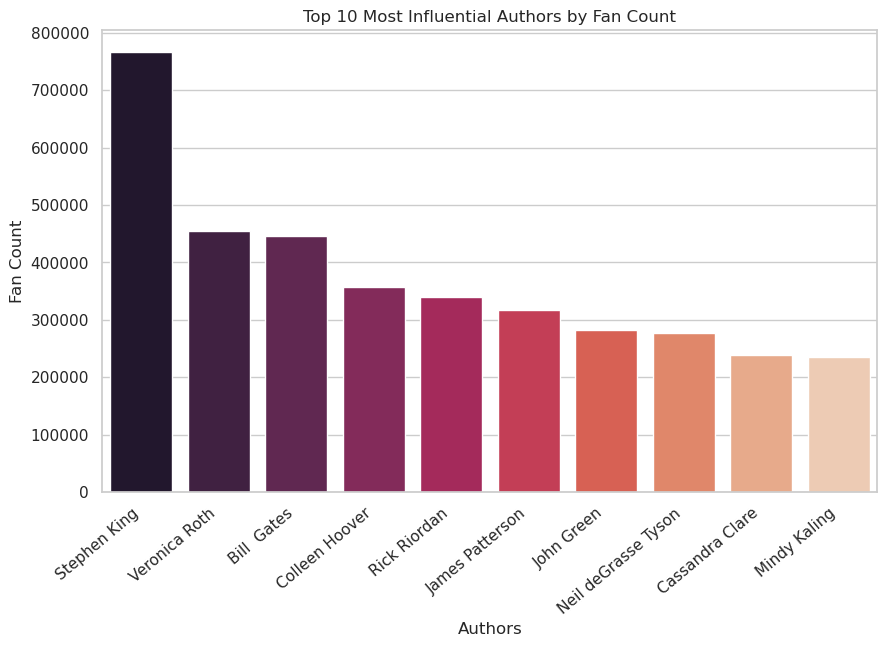

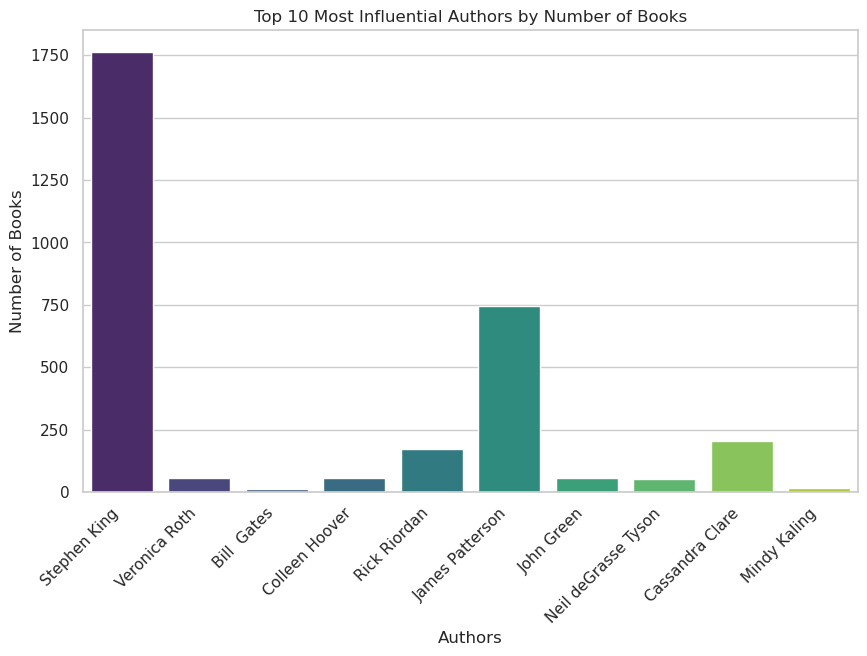

In [111]:
# Plotting according to their fan count 

top_10_authors_fans = df_authors.nlargest(10, 'fans_count')
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='name', y='fans_count', data=top_10_authors_fans, palette="rocket")
plot.set_title('Top 10 Most Influential Authors by Fan Count')
plot.set(xlabel='Authors', ylabel='Fan Count')
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, horizontalalignment='right')
plt.show()

# Plotting according to their # of books

top_10_authors_books = df_authors.nlargest(10, 'fans_count')

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='name', y='works_count', data=top_10_authors_books, palette='viridis')
plot.set_title('Top 10 Most Influential Authors by Number of Books')
plot.set(xlabel='Authors', ylabel='Number of Books')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

According to graphs which are show the top 10 authors by fan count and by number of books most influential author is Stephen King.

**RQ5_2**

Have they published any series of books? 

In [115]:
top_10_authors = df_authors.nlargest(10, ['fans_count', 'works_count'])
books_in_series = df_books[(df_books['author_id'].isin(top_10_authors['id'])) & (df_books['series_name'].notnull())]
authors_with_series = books_in_series['author_id'].unique()
top_authors_with_series = top_10_authors[top_10_authors['id'].isin(authors_with_series)]

print("Authors among the top 10 who have published a series:")
print(top_authors_with_series[['name']])


Authors among the top 10 who have published a series:
                       name
1017           Stephen King
6397            Bill  Gates
4537           Rick Riordan
1161        James Patterson
100166           John Green
3818    Neil deGrasse Tyson


If any, extract the longest series name among these authors.

In [116]:
longest_series_row = books_in_series.loc[books_in_series['series_name'].str.len().idxmax()]

author_name = df_authors[df_authors['id'] == longest_series_row['author_id']]['name'].values[0]
longest_series_name = longest_series_row['series_name']

print(f"The author with the longest series name among the top 10 is: {author_name}")
print(f"The longest series name is: '{longest_series_name}'")


The author with the longest series name among the top 10 is: Rick Riordan
The longest series name is: 'Percy Jackson and the Olympians'


How many of these authors have been published in different formats? 

In [117]:
# Count authors and get author names in the top 10 who have published in different formats
authors_diff_formats = books_in_series.groupby(['author_id', 'series_name'])['format'].nunique().reset_index()
count_authors_diff_formats = authors_diff_formats['author_id'].nunique()
author_names = df_authors[df_authors['id'].isin(authors_diff_formats['author_id'])]['name'].tolist()

print("Authors who have published series in different formats:")
for author in author_names:
    print(author)    
print()
print(f"{count_authors_diff_formats} authors have published series in different formats seen in the above.")

Authors who have published series in different formats:
Stephen King
James Patterson
Neil deGrasse Tyson
Rick Riordan
Bill  Gates
John Green

6 authors have published series in different formats seen in the above.


Provide a meaningful chart on the distribution of the formats and comment on it.

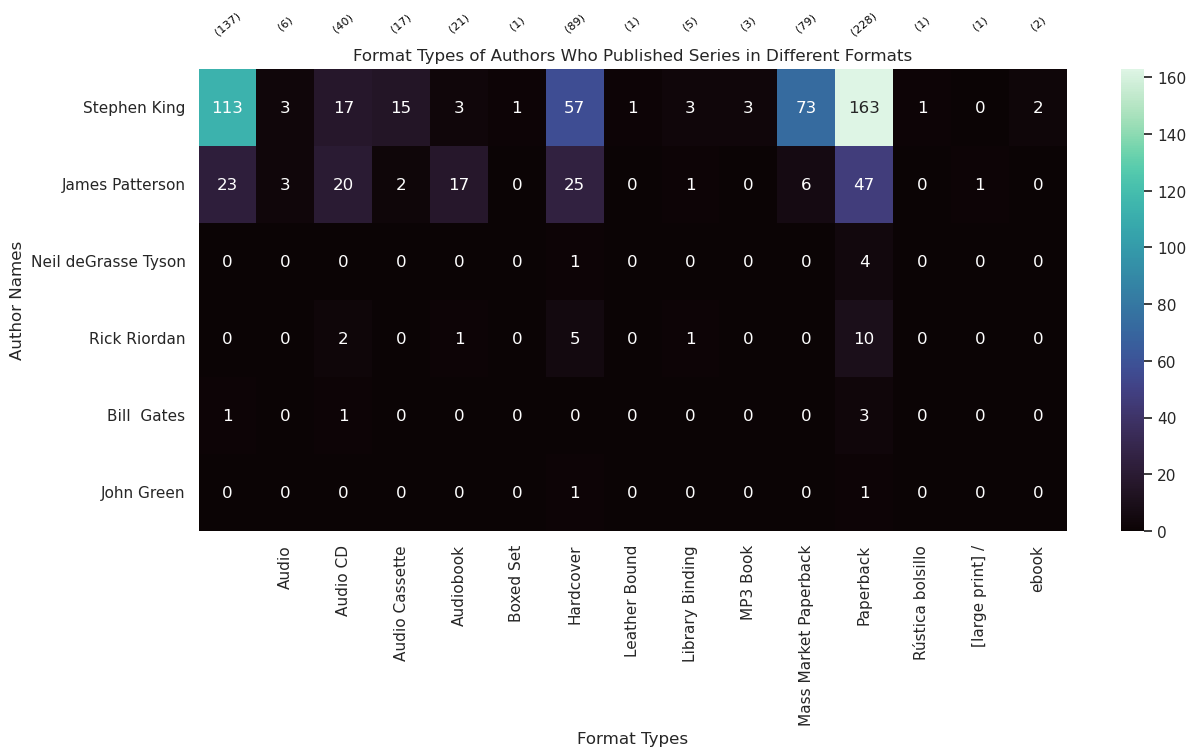

In [123]:
# Filter authors' format types
authors_format_counts = books_in_series.groupby('author_id')['format'].value_counts().unstack().fillna(0)

# Get author names from their IDs
author_names = df_authors.set_index('id')['name']

# Replace author IDs with their names
authors_format_counts = authors_format_counts.rename(index=author_names)

# Calculate the total number of each format
totals = authors_format_counts.sum()

plt.figure(figsize=(14, 6))
sns.heatmap(authors_format_counts, cmap='mako', annot=True, fmt='g')

for i, (col, total) in enumerate(totals.items()):
    plt.text(i + 0.5, -0.6, f"({int(total)})", ha='center', va='center', rotation=40, fontsize=8, color='black')

plt.title('Format Types of Authors Who Published Series in Different Formats')
plt.xlabel('Format Types')
plt.ylabel('Author Names')
plt.show()

From the graph, among the top 10 authors which have series (totally 6 authors) have published at least 1 series in paperback format. At the same time, according to the total number of each format, we can say that "leather bound", "boxed set", "rstica bolsillo", and "[large print]" are the types of format in which the least number of series (in fact, it was not used by 5 of these 6 authors) was produced.


Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”

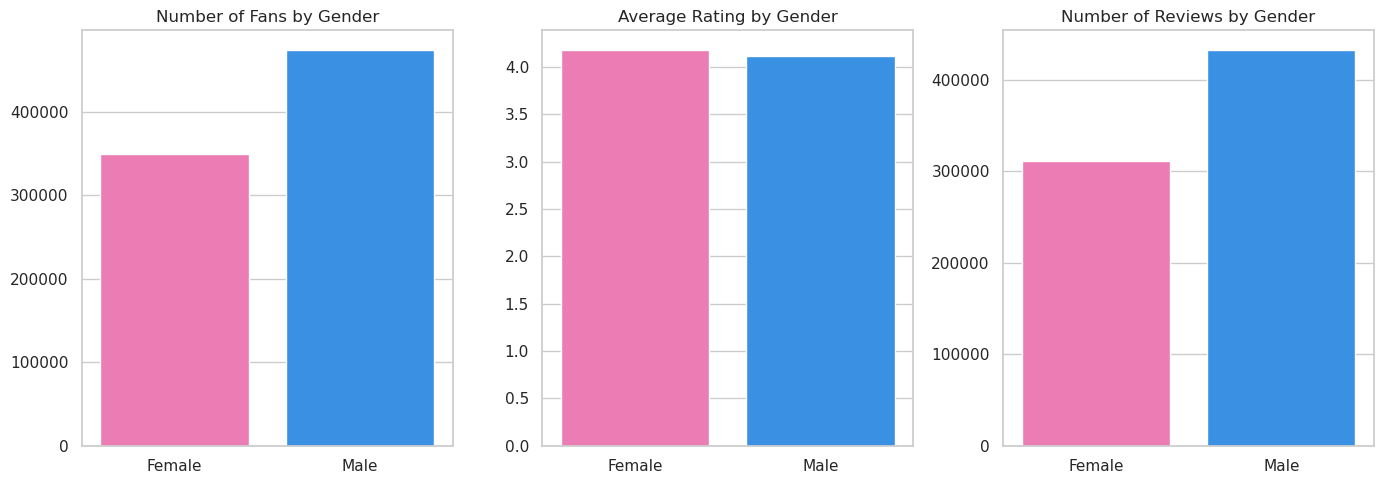

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
colors = ["hotpink", "dodgerblue"]  # Colors for Female and Male respectively

# Plotting Number of Fans by Gender
sns.barplot(x=['Female', 'Male'], y=[top_10_authors[top_10_authors['gender'] == 'female']['fans_count'].mean(), top_10_authors[top_10_authors['gender'] == 'male']['fans_count'].mean()], palette=colors, ax=axes[0])
axes[0].set_title('Number of Fans by Gender')

# Plotting Average Rating by Gender
sns.barplot(x=['Female', 'Male'], y=[top_10_authors[top_10_authors['gender'] == 'female']['average_rating'].mean(), top_10_authors[top_10_authors['gender'] == 'male']['average_rating'].mean()], palette=colors, ax=axes[1])
axes[1].set_title('Average Rating by Gender')

# Plotting Number of Reviews by Gender
sns.barplot(x=['Female', 'Male'], y=[top_10_authors[top_10_authors['gender'] == 'female']['text_reviews_count'].mean(), top_10_authors[top_10_authors['gender'] == 'male']['text_reviews_count'].mean()], palette=colors, ax=axes[2])
axes[2].set_title('Number of Reviews by Gender')

plt.tight_layout()
plt.show()


According to first graph which shows the number of fans by gender, male authors have more fan. This might indicate that male authors, on average, have a larger or more engaged fan   base compared to female authors. According to second graph which shows the average rating by gender, female authors have slightly higher average rating than male authors. 

According to last graph which shows the number of reviews by gender, male authors have more number of reviews. This may suggest that the works of male authors receive a higher volume of reviews, indicating potentially greater visibility or reader engagement

# 6 - [RQ6]

**RQ6_1**

Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series.

number for series of books

In [126]:
for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]

    if not series_books_author.empty:
        unique_series = series_books_author['series_id'].unique()
        author_name = df_authors[df_authors['id'] == author_id]['name'].iloc[0]
        
        print(f"\nSeries IDs for author {author_name} (ID {author_id}):")
        print(unique_series)


Series IDs for author Stephen King (ID 3389):
['40750' '' '167219' '217778' '49631' '69946' '49348' '117014' '178265'
 '50388' '231695' '203066' '97757']

Series IDs for author Bill  Gates (ID 23470):
['']

Series IDs for author Rick Riordan (ID 15872):
['40736' '41197' '']

Series IDs for author James Patterson (ID 3780):
['' '40543' '51312' '40469' '43579' '90613' '202859' '56397' '40445']

Series IDs for author John Green (ID 1406384):
['']

Series IDs for author Neil deGrasse Tyson (ID 12855):
['' '303246']


From this output, I can say that data missing for 2 authors. Since they do not have a series_id, I will not be able to calculate the average time period on them. 
So I decided to continue by removing these authors from the list for this question. I think there is a missing data in the data set. So, i removed blank series ids.

In [128]:
for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]
    series_with_id = series_books_author[(series_books_author['series_id'].notnull()) & (series_books_author['series_id'] != '')]

    if not series_with_id.empty:
        author_name = df_authors.loc[df_authors['id'] == author_id, 'name'].iloc[0]
        print(f"\nSeries for author {author_name} (ID {author_id}):")
        print()

        unique_series = series_with_id['series_id'].unique()
        unique_series_names = series_with_id['series_name'].unique()

        for series_id, series_name in zip(unique_series, unique_series_names):
            print(f"Series ID: {series_id}, Series Name: {series_name}")
            books_in_series = series_with_id[series_with_id['series_id'] == series_id]
            books_in_series = books_in_series.drop_duplicates(subset='work_id')  # Remove duplicate work_ids
            books_in_series = books_in_series.sort_values('original_publication_date')  # Sort by publication date
            books_in_series = books_in_series.dropna(subset=['original_publication_date'])  # Drop rows with NaT dates

            print(f"Books in Series:")

            for index, row in books_in_series.iterrows():
                work_id = row['work_id']
                original_publication_date = row['original_publication_date']

                try:
                    formatted_date = pd.to_datetime(original_publication_date).strftime('%Y-%m-%d')  # Format date
                    print(f"Work ID: {work_id}, Original Publication Date: {formatted_date}")
                except (ValueError, TypeError):
                    continue  # Skip rows with NaT values


Series for author Stephen King (ID 3389):

Series ID: 40750, Series Name: The Dark Tower
Books in Series:
Work ID: 46575, Original Publication Date: 1982-06-01
Work ID: 2113248, Original Publication Date: 1987-05-01
Work ID: 1810634, Original Publication Date: 1991-08-01
Work ID: 980612, Original Publication Date: 1991-10-01
Work ID: 750558, Original Publication Date: 1997-11-04
Work ID: 6309704, Original Publication Date: 2002-01-01
Work ID: 2754911, Original Publication Date: 2003-11-04
Work ID: 1178083, Original Publication Date: 2004-06-08
Work ID: 6309701, Original Publication Date: 2004-09-21
Series ID: 167219, Series Name: The Stand (split volumes)
Books in Series:
Work ID: 6292643, Original Publication Date: 1978-01-01
Work ID: 26537904, Original Publication Date: 1978-01-01
Series ID: 217778, Series Name: Skeleton Crew
Books in Series:
Work ID: 59181, Original Publication Date: 1980-01-01
Work ID: 57525683, Original Publication Date: 1985-06-21
Work ID: 17840304, Original Pub

I removed the duplicate work_id values with the same publication date under the same series_id:

In [135]:
for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]
    series_with_id = series_books_author[(series_books_author['series_id'].notnull()) & (series_books_author['series_id'] != '')]

    if not series_with_id.empty:
        author_name = df_authors.loc[df_authors['id'] == author_id, 'name'].iloc[0]
        print(f"\nSeries for author {author_name} (ID {author_id}):")
        print()

        unique_series = series_with_id['series_id'].unique()
        unique_series_names = series_with_id['series_name'].unique()

        for series_id, series_name in zip(unique_series, unique_series_names):
            print(f"Series ID: {series_id}, Series Name: {series_name}")
            books_in_series = series_with_id[series_with_id['series_id'] == series_id]
            books_in_series = books_in_series.drop_duplicates(subset=['series_id', 'original_publication_date'])  # Remove duplicates with the same series_id and original_publication_date
            books_in_series = books_in_series.dropna(subset=['original_publication_date'])  # Drop rows with NaT dates

            print(f"Books in Series:")

            for index, row in books_in_series.iterrows():
                work_id = row['work_id']
                original_publication_date = row['original_publication_date']

                try:
                    formatted_date = pd.to_datetime(original_publication_date).strftime('%Y-%m-%d')  # Format date
                    print(f"Work ID: {work_id}, Original Publication Date: {formatted_date}")
                except (ValueError, TypeError):
                    continue  # Skip rows with NaT values



Series for author Stephen King (ID 3389):

Series ID: 40750, Series Name: The Dark Tower
Books in Series:
Work ID: 2754911, Original Publication Date: 2003-11-04
Work ID: 6309701, Original Publication Date: 2004-09-21
Work ID: 6309704, Original Publication Date: 2002-01-01
Work ID: 1178083, Original Publication Date: 2004-06-08
Work ID: 2113248, Original Publication Date: 1987-05-01
Work ID: 1810634, Original Publication Date: 1991-08-01
Work ID: 750558, Original Publication Date: 1997-11-04
Work ID: 46575, Original Publication Date: 1982-06-01
Work ID: 980612, Original Publication Date: 1991-10-01
Series ID: 167219, Series Name: The Stand (split volumes)
Books in Series:
Work ID: 6292643, Original Publication Date: 1978-01-01
Series ID: 217778, Series Name: Skeleton Crew
Books in Series:
Work ID: 59181, Original Publication Date: 1980-01-01
Work ID: 57525683, Original Publication Date: 1985-06-21
Series ID: 49631, Series Name: The Talisman
Books in Series:
Work ID: 1738813, Original 

Average of the average time gap between subsequent publications for each author detailed version:

In [140]:
for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]
    series_with_id = series_books_author[(series_books_author['series_id'].notnull()) & (series_books_author['series_id'] != '')]

    if not series_with_id.empty:
        author_name = df_authors.loc[df_authors['id'] == author_id, 'name'].iloc[0]
        print(f"\nSeries for author {author_name} (ID {author_id}):")
        print()

        unique_series = series_with_id['series_id'].unique()
        unique_series_names = series_with_id['series_name'].unique()

        for series_id, series_name in zip(unique_series, unique_series_names):
            print(f"Series ID: {series_id}, Series Name: {series_name}")
            books_in_series = series_with_id[series_with_id['series_id'] == series_id]
            books_in_series = books_in_series.drop_duplicates(subset=['series_id', 'original_publication_date'])  # Remove duplicates with the same series_id and original_publication_date
            books_in_series = books_in_series.sort_values('original_publication_date')  # Sort by publication date
            books_in_series = books_in_series.dropna(subset=['original_publication_date'])  # Drop rows with NaT dates

            print(f"Books in Series:")

            if len(books_in_series) > 1:  
                time_diffs = []

                for index, row in books_in_series.iterrows():
                    original_publication_date = row['original_publication_date']

                    try:
                        date = pd.to_datetime(original_publication_date)
                        time_diffs.append(date)  

                    except (ValueError, TypeError):
                        continue  
                        
                time_gaps = [j - i for i, j in zip(time_diffs[:-1], time_diffs[1:])]
                total_seconds = sum([td.total_seconds() for td in time_gaps])
                average_gap = total_seconds / len(time_gaps) if len(time_gaps) > 0 else 0
                average_gap_days = average_gap / (60 * 60 * 24)

                print(f"Average Time Gap between Subsequent Publications for Series '{series_name}': {average_gap_days:.2f} days")
            else:
                print("Skipping calculation as there is only one book in the series")



Series for author Stephen King (ID 3389):

Series ID: 40750, Series Name: The Dark Tower
Books in Series:
Average Time Gap between Subsequent Publications for Series 'The Dark Tower': 1018.50 days
Series ID: 167219, Series Name: The Stand (split volumes)
Books in Series:
Skipping calculation as there is only one book in the series
Series ID: 217778, Series Name: Skeleton Crew
Books in Series:
Average Time Gap between Subsequent Publications for Series 'Skeleton Crew': 1998.00 days
Series ID: 49631, Series Name: The Talisman
Books in Series:
Average Time Gap between Subsequent Publications for Series 'The Talisman': 3282.00 days
Series ID: 69946, Series Name: The Green Mile
Books in Series:
Average Time Gap between Subsequent Publications for Series 'The Green Mile': 67.17 days
Series ID: 49348, Series Name: The Secretary of Dreams
Books in Series:
Skipping calculation as there is only one book in the series
Series ID: 117014, Series Name: The Shining
Books in Series:
Skipping calculat

Average of the average time gap between subsequent publications for each author:

In [136]:
author_averages = {}  # Dictionary to store averages for each author

for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]
    series_with_id = series_books_author[(series_books_author['series_id'].notnull()) & (series_books_author['series_id'] != '')]

    if not series_with_id.empty:
        unique_series = series_with_id['series_id'].unique()
        author_name = df_authors.loc[df_authors['id'] == author_id, 'name'].iloc[0]
        
        average_time_gaps = []  # List to store average time gaps for each series

        for series_id in unique_series:
            books_in_series = series_with_id[series_with_id['series_id'] == series_id]
            books_in_series = books_in_series.drop_duplicates(subset=['series_id', 'original_publication_date'])
            books_in_series = books_in_series.sort_values('original_publication_date')
            books_in_series = books_in_series.dropna(subset=['original_publication_date'])

            if len(books_in_series) > 1:
                time_diffs = []
                for index, row in books_in_series.iterrows():
                    original_publication_date = row['original_publication_date']
                    try:
                        date = pd.to_datetime(original_publication_date)
                        time_diffs.append(date)
                    except (ValueError, TypeError):
                        continue

                time_gaps = [j - i for i, j in zip(time_diffs[:-1], time_diffs[1:])]
                total_seconds = sum([td.total_seconds() for td in time_gaps])
                average_gap = total_seconds / len(time_gaps) if len(time_gaps) > 0 else 0
                average_gap_days = average_gap / (60 * 60 * 24)
                average_time_gaps.append(average_gap_days)

        # Calculate the average of the average time gaps for the author
        author_averages[author_name] = sum(average_time_gaps) / len(average_time_gaps) if len(average_time_gaps) > 0 else 0

# Print the average time gaps for each author
for author, avg_time_gap in author_averages.items():
    print(f"Author: {author}, Average Time Gap: {avg_time_gap:.2f} days")


Author: Stephen King, Average Time Gap: 1275.93 days
Author: Rick Riordan, Average Time Gap: 429.67 days
Author: James Patterson, Average Time Gap: 746.89 days
Author: Neil deGrasse Tyson, Average Time Gap: 3287.00 days


Overall Average Time Gap for all authors:

In [137]:
average_time_gaps = [1275.93, 429.67, 746.89, 3287.00]

# Calculate the average time gap
overall_average_time_gap = sum(average_time_gaps) / len(average_time_gaps) if average_time_gaps else 0

print(f"Average time gap between two subsequent publications for a series of books': {overall_average_time_gap:.2f} days")


Average time gap between two subsequent publications for a series of books': 1434.87 days


for books not belonging to a series:

In [138]:
for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]

    if not series_books_author.empty:
        books_not_in_series = series_books_author[(series_books_author['series_id'].isnull()) | (series_books_author['series_id'] == '')]
        if not books_not_in_series.empty:
            author_name = df_authors[df_authors['id'] == author_id]['name'].iloc[0]
            print(f"\nBooks not belonging to a series for author {author_name} (ID {author_id}):")
            unique_books = books_not_in_series.drop_duplicates('work_id')[['work_id', 'original_publication_date']]
            print(unique_books)



Books not belonging to a series for author Stephen King (ID 3389):
        work_id original_publication_date
3408    3083085                1987-02-02
3416    1742269                1978-10-03
3425   40802405                1975-10-17
3426    3048937                1975-10-17
3428   68840649                          
...         ...                       ...
88527  57587151                          
88570    150214                   1992-05
88587  17841275                      1985
88647    150294                1986-06-30
88650    150296                   1987-12

[91 rows x 2 columns]

Books not belonging to a series for author Bill  Gates (ID 23470):
       work_id original_publication_date
26016      314                1999-03-01
26019  1479853                1995-11-21

Books not belonging to a series for author Rick Riordan (ID 15872):
       work_id original_publication_date
66841   109051                2003-01-01

Books not belonging to a series for author James Patterson (ID

In [141]:
for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]
    books_not_in_series = series_books_author[(series_books_author['series_id'].isnull()) | (series_books_author['series_id'] == '')]
    books_not_in_series = books_not_in_series.drop_duplicates(subset=['work_id', 'original_publication_date'])

    if not books_not_in_series.empty and len(books_not_in_series) > 1: #I exclude authors with only one book
        author_name = df_authors[df_authors['id'] == author_id]['name'].iloc[0]
        print(f"\nCalculating average time gap for books not in a series for author {author_name} (ID {author_id}):")

        books_not_in_series['original_publication_date'] = pd.to_datetime(books_not_in_series['original_publication_date'], errors='coerce')
        books_not_in_series = books_not_in_series.sort_values('original_publication_date')

        time_diffs = books_not_in_series['original_publication_date'].diff().dropna()
        time_diffs_days = time_diffs.dt.days
        average_gap_days = time_diffs_days.mean()

        print(f"Average Time Gap between Subsequent Publications for Books Not Belonging to a Series: {average_gap_days:.2f} days")

        author_averages[author_name] = average_gap_days



Calculating average time gap for books not in a series for author Stephen King (ID 3389):
Average Time Gap between Subsequent Publications for Books Not Belonging to a Series: 303.60 days

Calculating average time gap for books not in a series for author Bill  Gates (ID 23470):
Average Time Gap between Subsequent Publications for Books Not Belonging to a Series: 1196.00 days

Calculating average time gap for books not in a series for author James Patterson (ID 3780):
Average Time Gap between Subsequent Publications for Books Not Belonging to a Series: 840.38 days

Calculating average time gap for books not in a series for author John Green (ID 1406384):
Average Time Gap between Subsequent Publications for Books Not Belonging to a Series: 567.00 days

Calculating average time gap for books not in a series for author Neil deGrasse Tyson (ID 12855):
Average Time Gap between Subsequent Publications for Books Not Belonging to a Series: 764.00 days


In [139]:
average_gap_values = [303.60, 1196.00, 840.38, 567.00, 764.00] 
overall_average_gap = sum(average_gap_values) / len(average_gap_values) if average_gap_values else 0
print(f"Average Time Gap between Subsequent Publications for Books Not Belonging to a Series': {overall_average_gap:.2f} days")


Average Time Gap between Subsequent Publications for Books Not Belonging to a Series': 734.20 days


In this question, I would expect the average time interval between books in the series to be shorter as an output. But after reading the data, I saw that this expectation was not correct.
The average time interval between two successive publications of a book series is greater than the average time interval between subsequent publications of books not belonging to the series.

**RQ6_2**

For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [25]:
print(top_10_authors.columns)

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')


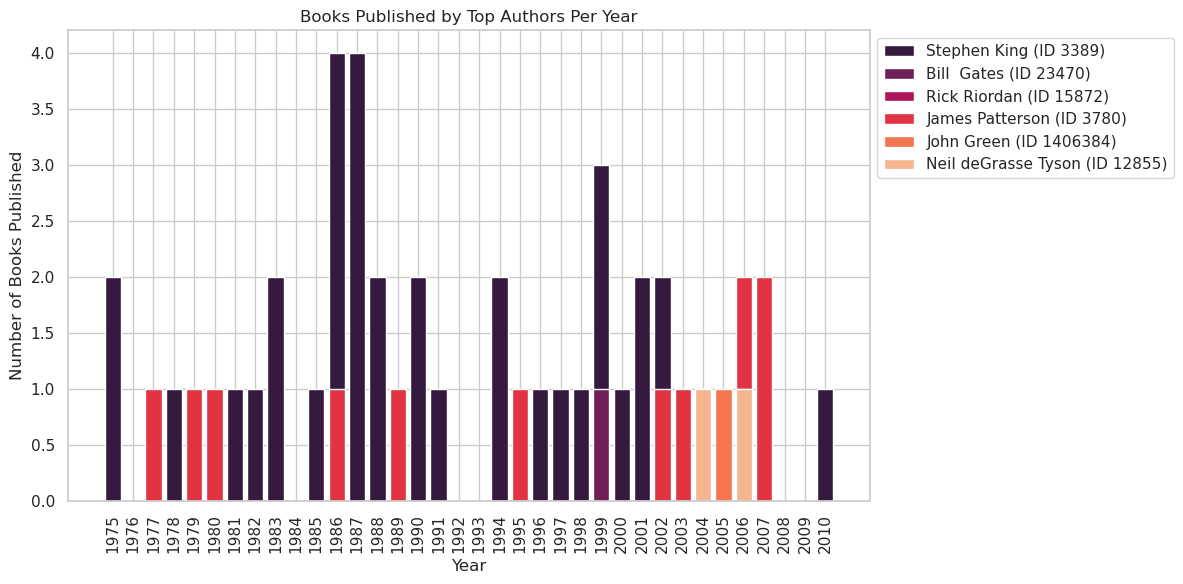

In [142]:
plt.figure(figsize=(12, 6))

for author_id in top_10_authors['id']:
    series_books_author = df_books[(df_books['series_name'].notnull()) & (df_books['author_id'] == author_id)]

    if not series_books_author.empty:
        books_not_in_series = series_books_author[(series_books_author['series_id'].isnull()) | (series_books_author['series_id'] == '')]
        if not books_not_in_series.empty:
            author_name = df_authors[df_authors['id'] == author_id]['name'].iloc[0]
            unique_books = books_not_in_series.drop_duplicates('work_id')[['work_id', 'original_publication_date']]

            unique_books['original_publication_date'] = pd.to_datetime(unique_books['original_publication_date'], errors='coerce')

            # Filter years between 1975 and 2010
            unique_books = unique_books[unique_books['original_publication_date'].dt.year.between(1975, 2010)]

            # Group by year and count the number of books
            unique_books['Year'] = unique_books['original_publication_date'].dt.year
            books_by_year = unique_books.groupby('Year').size()

            sns.set_palette("rocket")

            plt.bar(books_by_year.index, books_by_year.values, label=f'{author_name} (ID {author_id})')

plt.title('Books Published by Top Authors Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.xticks(range(1975, 2011), rotation=90) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.tight_layout()
plt.show()


It can be seen from the graph that the total number of books published in 1986 -1987 was the highest. We can also say that Stephen King is the most dominant author on the graph. We can also conclude that, in general, the authors were contemporary with each other. The reason I generalize is that although some authors publish books within certain years, although their production rates vary, some authors - such as Neil deGrasse Tyson - only publish books within a limited range of years.
Therefore, by looking at the graph, we can say that the authors are generally contemporary with each other.

# 7 - [RQ7]

**RQ7_1**

Estimate the probability that a book has over 30% of the ratings above 4.

In [143]:
columns = ['title', 'work_id', 'num_pages', 'author_name', 'rating_dist', 'average_rating']
df_books[columns]

,title,work_id,num_pages,author_name,rating_dist,average_rating
0,Harry Potter and the Order of the Phoenix (Har...,2809203,870,J.K. Rowling,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,4.50
1,Harry Potter and the Sorcerer's Stone (Harry P...,4640799,309,J.K. Rowling,5:4801606|4:1681521|3:623286|2:145898|1:125040...,4.48
2,Harry Potter and the Chamber of Secrets (Harry...,6231171,352,J.K. Rowling,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,4.43
3,Harry Potter and the Prisoner of Azkaban (Harr...,2402163,435,J.K. Rowling,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,4.57
4,Harry Potter and the Goblet of Fire (Harry Pot...,3046572,734,J.K. Rowling,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,4.56
...,...,...,...,...,...,...
99979,Total Workday Control Using Microsoft Outlook,13731267,289,Michael Linenberger,5:235|4:231|3:103|2:38|1:11|total:618,4.04
99980,Desata Tu Poder Ilimitado!,20409653,450,Anthony Robbins,5:37|4:12|3:12|2:3|1:1|total:65,4.25
99981,Poder Sin Limites: La Nueva Ciencia del Desarr...,165637,393,Anthony Robbins,5:15180|4:8706|3:4314|2:1116|1:575|total:29891,4.23
99982,Introduction To Anthony Robbins Personal Power II,79231,4,Anthony Robbins,5:382|4:147|3:66|2:14|1:13|total:622,4.40


In [144]:
def extract_data(cell):
    extracted_data = {}
    pairs = cell.split('|')
    for pair in pairs:
        key, value = pair.split(':')
        extracted_data[key] = value
    return pd.Series(extracted_data)

df_ratings = pd.DataFrame()
df_ratings = df_books["rating_dist"].apply(extract_data)
df_ratings = pd.concat([df_books, df_ratings], axis=1)


In [147]:
columns_to_convert = ["5", "4", "3", "2", "1", "total"]

for col in columns_to_convert:
    df_ratings[col] = pd.to_numeric(df_ratings[col], errors="coerce").astype(int)
    
ratio = (df_ratings["5"] + df_ratings["4"])/df_ratings["total"]
ratio = ratio.dropna()
ratio

0        0.889989
1        0.878788
2        0.865548
3        0.913275
4        0.913593
           ...   
99979    0.754045
99980    0.753846
99981    0.799103
99982    0.850482
99983    0.771083
Length: 97661, dtype: float64

In [152]:
rating_dist_series = df_books["rating_dist"]

def prop_4_or_higher(rating_distribution):
    ratings = rating_distribution.split('|')
    total_ratings = 0
    four_or_higher_ratings = 0

    for rating in ratings:
        key, value = rating.split(':')
        if key == 'total':
            continue 
        key = int(key)
        value = int(value)
        total_ratings += value
        if key > 4:
            four_or_higher_ratings += value

    if total_ratings == 0:
        return 0.0 
    proportion_4_or_higher = four_or_higher_ratings / total_ratings
    return proportion_4_or_higher

df_books['proportion_4_or_higher'] = rating_dist_series.apply(prop_4_or_higher)
proportion_4_or_higher = df_books['proportion_4_or_higher'].mean()

print("Proportion of 4-Star or Higher Ratings:", proportion_4_or_higher)


Proportion of 4-Star or Higher Ratings: 0.33468032583005314


In [151]:
books_above_30_percent = df_books[df_books['proportion_4_or_higher'] > 0.3]
probability_above_30_percent = len(books_above_30_percent) / len(df_books)

print("Estimated Probability of books having over 30% ratings above 4:", probability_above_30_percent)


Estimated Probability of books having over 30% ratings above 4: 0.5710613698191711


**RQ7_2**

Estimate the probability that an author publishes a new book within two years from its last work.

In [153]:
grouped = df_books.groupby(['author_name', 'author_id'])
total_authors = 0
new_book = 0

for (author_name, author_id), books in grouped:
    books = books.sort_values(by='original_publication_date')
    books['original_publication_date'] = pd.to_datetime(books['original_publication_date'], format="%Y", errors='coerce')

    for i in range(1, len(books)):
        time_difference = books.iloc[i]['original_publication_date'] - books.iloc[i-1]['original_publication_date']
        if not pd.isna(time_difference) and time_difference <= pd.Timedelta(days=730):
            new_book += 1
            break
    total_authors += 1

probability = new_book / total_authors
print("Estimated Probability:", probability)


Estimated Probability: 0.17965447528027936


**RQ7_3**

In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

In [154]:
df_worst = pd.read_json("worst.json", lines=True)

Filtering just related title which is "The Worst Books of All Time"

In [155]:
worst_title = df_worst[df_worst['title'] == 'The Worst Books of All Time']
worst_title.head()

,id,title,description,description_html,num_pages,num_books,num_voters,created_date,tags,num_likes,created_by,num_comments,books
0,2,The Worst Books of All Time,What do you think are the worst books ever wri...,\n What do you think are the worst books ...,74,7395,18260,"May 20th, 2008","[abominable, abomination, awful, bad, disgusti...",175,"{'name': 'Michael Economy', 'id': '73'}",2570,"[{'book_id': '41865', 'title': 'Twilight', 'au..."


Extending the "books" dataset

In [156]:
original_data = list(df_worst["books"])

restructured_data = {entry['book_id']: {key: entry[key] for key in entry if key != 'book_id'} for entry in original_data[0]}

worst_books_df = pd.DataFrame.from_dict(restructured_data, orient='index').reset_index().rename(columns={'index': 'book_id'})
worst_books_df


,book_id,title,author_id,author,position
0,41865,Twilight,941441,Stephenie Meyer,"{'ranking': 1, 'score': 527144, 'votes': 5303}"
1,1162543,Breaking Dawn,941441,Stephenie Meyer,"{'ranking': 2, 'score': 400813, 'votes': 4061}"
2,49041,New Moon,941441,Stephenie Meyer,"{'ranking': 3, 'score': 356742, 'votes': 3648}"
3,428263,Eclipse,941441,Stephenie Meyer,"{'ranking': 4, 'score': 323657, 'votes': 3338}"
4,10818853,Fifty Shades of Grey,4725841,E.L. James,"{'ranking': 5, 'score': 231106, 'votes': 2356}"
...,...,...,...,...,...
7388,30317417,Most Dangerous Place,27572,James Grippando,"{'ranking': 7389, 'score': 2, 'votes': 1}"
7389,40139233,Sacred Duty: A Soldier's Tour at Arlington Nat...,7742817,Tom Cotton,"{'ranking': 7390, 'score': 2, 'votes': 1}"
7390,176392,Who Stole Feminism? How Women Have Betrayed Women,393,Christina Hoff Sommers,"{'ranking': 7391, 'score': 1, 'votes': 1}"
7391,1318015,"Woulda, Coulda, Shoulda: Overcoming Regrets, M...",48336,Arthur Freeman,"{'ranking': 7392, 'score': 1, 'votes': 1}"


Filter books with more than 700 pages

In [157]:
df_books['num_pages'] = pd.to_numeric(df_books['num_pages'], errors='coerce')

more_than_700 = df_books[df_books['num_pages'] > 700]
more_than_700

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description,proportion_4_or_higher
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870.0,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...,0.637009
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734.0,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...,0.668239
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,21457576,0439682584,9780439682589,,eng,...,,https://s.gr-assets.com/assets/nophoto/book/11...,Scholastic,2690.0,,,,"[{'name': 'to-read', 'count': 7030}, {'name': ...",Box Set containing Harry Potter and the Sorcer...,0.852923
7,10,"Harry Potter Collection (Harry Potter, #1-6)",None,J.K. Rowling,1077326,21457570,0439827604,9780439827607,,eng,...,Box Set,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,3342.0,45175,Harry Potter,1-6,"[{'name': 'to-read', 'count': 5809}, {'name': ...","Six years of magic, adventure, and mystery mak...",0.804797
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,None,Douglas Adams,4,135328,0517226952,9780517226957,,eng,...,,https://i.gr-assets.com/images/S/compressed.ph...,Gramercy Books,815.0,40957,The Hitchhiker's Guide to the Galaxy,0.5-5,"[{'name': 'to-read', 'count': 128191}, {'name'...","At last in paperback in one complete volume, h...",0.570375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,179598,The Collected Poems of Thomas Merton,None,Thomas Merton,1711,173515,0811207692,9780811207690,,,...,,https://s.gr-assets.com/assets/nophoto/book/11...,New Directions,1056.0,,,,"[{'name': 'to-read', 'count': 267}, {'name': '...","In 1944, New Directions brought out Thomas Mer...",0.433121
99835,179708,Rasputin: The Last Word,"[{'id': '8522960', 'name': 'Edvard Radzinsky',...",Edvard Radzinsky,8522960,6186417,0753810808,9780753810804,,eng,...,,https://s.gr-assets.com/assets/nophoto/book/11...,Phoenix Paperbacks,728.0,,,,"[{'name': 'to-read', 'count': 2060}, {'name': ...","Based upon long-lost contemporary documents, t...",0.270862
99955,180068,The History of Foreign Investment in the Unite...,None,Mira Wilkins,104945,173980,0674396669,9780674396661,,,...,,https://s.gr-assets.com/assets/nophoto/book/11...,Harvard University Press,992.0,179584,The History of Foreign Investment in the Unite...,1,"[{'name': 'to-read', 'count': 5}]","From the colonial era to 1914, America was a d...",0.000000
99956,180069,The History of Foreign Investment in the Unite...,None,Mira Wilkins,104945,173981,0674013085,9780674013087,,,...,,https://s.gr-assets.com/assets/nophoto/book/11...,Harvard University Press,1008.0,179584,The History of Foreign Investment in the Unite...,2,"[{'name': 'to-read', 'count': 7}]","Mira Wilkins, the foremost authority on foreig...",1.000000


In [161]:
worst_books_df['book_id'] = worst_books_df['book_id'].astype('int64')
more_than_700['id'] = more_than_700['id'].astype('int64')
merged_df = worst_books_df.merge(more_than_700, left_on='book_id', right_on='id', how='inner')

probability = len(merged_df) / len(more_than_700)
print("The probability of a book being included in the 'worst_books_df' list, given it has more than 700 pages is:", probability)


The probability of a book being included in the 'worst_books_df' list, given it has more than 700 pages is: 0.03758020164986251


**RQ7_4**

Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

In [162]:
in_the_worst = pd.merge(worst_books_df, df_books, left_on='book_id', right_on='id', how='inner')
in_the_worst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    2089 non-null   int64  
 1   title_x                    2089 non-null   object 
 2   author_id_x                2089 non-null   object 
 3   author                     2089 non-null   object 
 4   position                   2089 non-null   object 
 5   id                         2089 non-null   int64  
 6   title_y                    2089 non-null   object 
 7   authors                    506 non-null    object 
 8   author_name                2089 non-null   object 
 9   author_id_y                2089 non-null   int64  
 10  work_id                    2089 non-null   int64  
 11  isbn                       2089 non-null   object 
 12  isbn13                     2089 non-null   object 
 13  asin                       2089 non-null   objec

In [160]:
prob_x = len(in_the_worst) / len(df_books)
prob_y = len(more_than_700) / len(df_books)

if (prob_x * prob_y == prob_x_and_y):
    print("They are independent")
else:
    print("They are not independent")

They are not independent


The analysis suggests a connection between a book's inclusion in the "Worst Books of All Time" list and the book having more than 700 pages. This relationship indicates that a book's length exceeding 700 pages might influence its likelihood of being regarded as one of the worst books.

#  8 - [RQ8]

In [2]:
data = []

colonne_interessate =  ['id', 'language', 'average_rating','ratings_count','num_pages','author_id']

with open('lighter_books.json', 'r') as file:
    for line in file:
        line = line.strip()
        
        if line:
            try:
                json_data = json.loads(line)
                
                data_row = {colonna: json_data.get(colonna) for colonna in colonne_interessate}
                
                data.append(data_row)
            except json.JSONDecodeError as e:
                print(f"Errore di decodifica JSON: {e}")

df = pd.DataFrame(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027431 entries, 0 to 7027430
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   language        object 
 2   average_rating  float64
 3   ratings_count   int64  
 4   num_pages       object 
 5   author_id       int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 321.7+ MB


## 8.1

## Can you demonstrate that readers usually rate the longest books as the worst?


* ###  We start by ordering the dataset decreasingly by the average rating and we remove the null values

In [4]:
df_by_rating = df.sort_values(by='average_rating', ascending=False)

In [5]:
df_by_rating = df_by_rating.replace('', np.nan)

In [6]:
df_by_rating = df_by_rating.dropna(subset=['num_pages', 'average_rating'])

* ### we see if we can find negative correlation between the two variables

In [7]:
correlation = df_by_rating['average_rating'].corr(df_by_rating['num_pages'])
correlation

0.00033796874316387523

In [8]:
# statistic test to evaluate the correlation

correlation, p_value = pearsonr(df_by_rating['average_rating'], df_by_rating['num_pages'])


In [9]:
correlation,p_value               #NO correlation

(0.0003379687431638812, 0.5014722757179794)

* ### We can se no correlation between the variables

* ### We try now to see grafically the relation between the average rating and the number of pages

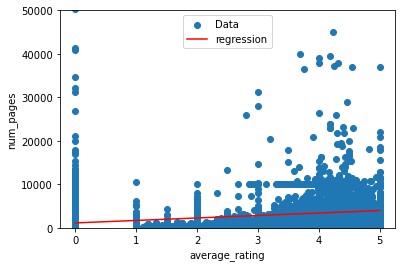

In [10]:

x = df_by_rating['average_rating']
y = df_by_rating['num_pages']


slope, intercept = np.polyfit(x, y, 1)

x_regression = np.array([min(x), max(x)])

y_regression = slope * x_regression + intercept

plt.scatter(x, y, label='Data')

plt.plot(x_regression, y_regression, color='red', label='regression')

plt.xlabel('average_rating')
plt.ylabel('num_pages')
plt.legend()
plt.ylim(0, 50000)
plt.show()



* ### As we can see in the graph there is no evidence to say that longest books are rated the worst. In the image are pictured only the books with less than 50000 pages to make it more clear

* ### Now we divide our data in sections each one of increasing pages, to graphically see if the average ratings are different 

In [11]:
# we order  the dataset by number of pages
df_by_pages = df_by_rating.sort_values(by='num_pages', ascending=False)

In [12]:

# we create groups of pages 
df_by_pages['gruppi'] = pd.cut(df_by_pages['num_pages'], [-0.001,50,100,200,300,400,500,1000,2000,5000,20000,100000,2147483647])



In [13]:
df_by_pages.groupby('gruppi',observed=True)['average_rating'].count()

gruppi
(-0.001, 50.0]              413525
(50.0, 100.0]               328841
(100.0, 200.0]              927076
(200.0, 300.0]              935097
(300.0, 400.0]              717750
(400.0, 500.0]              304077
(500.0, 1000.0]             289119
(1000.0, 2000.0]             33446
(2000.0, 5000.0]              5818
(5000.0, 20000.0]              779
(20000.0, 100000.0]             53
(100000.0, 2147483647.0]        15
Name: average_rating, dtype: int64

* ### We plot our data. In the image we can see the different ratings for each group. We can observe that the values are different in every section, but we cannot say that books with more pages are rated the worst

Text(0.5, 1.0, 'Average rating for different classes of number of pages')

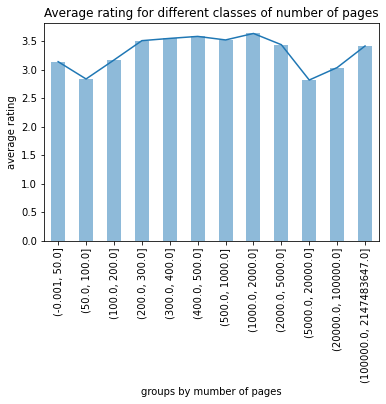

In [14]:
plt.plot(list(df_by_pages.groupby('gruppi',observed=True)['average_rating'].mean()))
df_by_pages.groupby('gruppi',observed=True)['average_rating'].mean().plot(kind='bar', alpha=0.5)
plt.xlabel('groups by mumber of pages')
plt.ylabel('average rating')
plt.title('Average rating for different classes of number of pages')

### We can conclude saying that no, readers usually don't rate the longest books as the worst

# 8.2

## Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

* ### We start by dropping the null values in the column 'language', then we create two datasets, one containing the books written in english and the other one with all the other languages

In [15]:
df_by_lang=df_by_rating.dropna(subset=['language'])

In [16]:

condizione = (df_by_lang['language'] == 'eng') | (df_by_lang['language'] == 'en') | (df_by_lang['language'] == 'en-CA') | (df_by_lang['language'] == 'en-GB') | (df_by_lang['language'] == 'en-US') | (df_by_lang['language'] == 'enm')

en_df = df_by_lang[condizione]

rest_df = df_by_lang[~condizione]

* ### We analize the distribution of the average rate in the two sub-groups, an we can see that the average rating§ of the english books is higher than the one of all the other languages

In [17]:
en_df['average_rating'].describe()

count    926145.000000
mean          3.753400
std           0.864977
min           0.000000
25%           3.640000
50%           3.900000
75%           4.130000
max           5.000000
Name: average_rating, dtype: float64

In [18]:
rest_df['average_rating'].describe()

count    890692.000000
mean          3.707270
std           0.837818
min           0.000000
25%           3.580000
50%           3.870000
75%           4.100000
max           5.000000
Name: average_rating, dtype: float64

* ### To see if this difference is tatistically relevant, we use the t test of Student, a test specifically designed to determine if there is a statistically significant difference between the means of two independently related groups.

In [19]:
stat, p_value = stats.ttest_ind(en_df['average_rating'], rest_df['average_rating'])
stat, p_value

(36.49265759237476, 1.8512478445143414e-291)

* ### As we can see from the results of the test, since the statistic is approximately 36.5 and the p-value is small enough, we can affirm that on average the books written in english receive a HIGHER rating

# 8.3

## About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.


* ### We start by extracting the useful statistical informations from each one of the sub groups, then we plot the two boxplots

In [20]:
en_df['average_rating'].describe()

count    926145.000000
mean          3.753400
std           0.864977
min           0.000000
25%           3.640000
50%           3.900000
75%           4.130000
max           5.000000
Name: average_rating, dtype: float64

In [21]:
en_df['average_rating'].mode()

0    4.0
Name: average_rating, dtype: float64

In [22]:
rest_df['average_rating'].describe()

count    890692.000000
mean          3.707270
std           0.837818
min           0.000000
25%           3.580000
50%           3.870000
75%           4.100000
max           5.000000
Name: average_rating, dtype: float64

In [23]:
rest_df['average_rating'].mode()

0    4.0
Name: average_rating, dtype: float64

* ### We start by saying all the main statistics, so mean, quartiles and std, are higher in the english books, except foe the mode, the min and the max that are equal

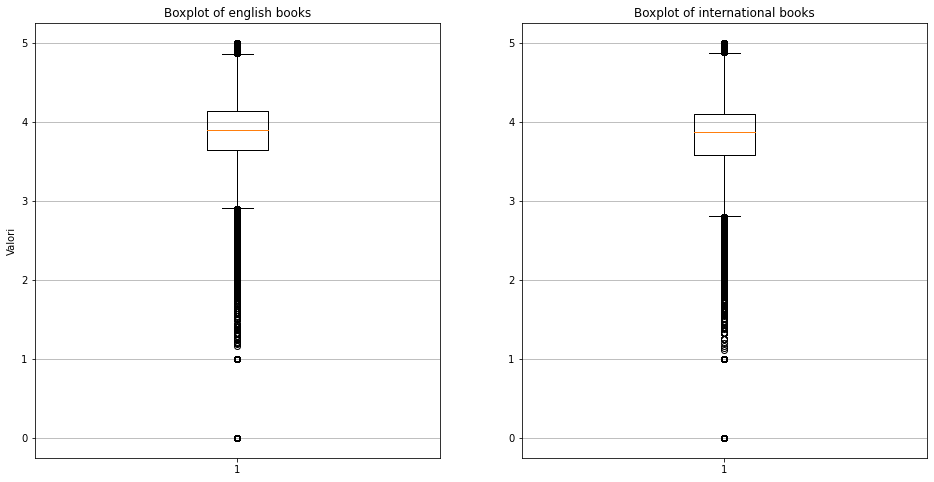

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))


ax[0].boxplot(en_df['average_rating'])
ax[0].set_title('Boxplot of english books')
ax[0].set_ylabel('Valori')

ax[1].boxplot(rest_df['average_rating'])
ax[1].set_title('Boxplot of international books')
ax[1].set_ylabel('')

ax[0].grid(axis='y')
ax[1].grid(axis='y')
plt.show()



* ### The two boxplots are pretty similar to each other, we can see that the values are generally ligthly shifted up for the english books. We can see that in both cases there is a large number of outliers, that represent low ratings, and that the distributions are not symmetric, they are shifted towards high values. The inter-quantile range is small compared to the whole distribution in both cases

# 8.4

## It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

* ### Now we work on the authors dataset, so we load it and we sort it by the number of fans


In [25]:
df2 = pd.read_json('lighter_authors.json',lines=True)
df2=df2.sort_values(by='fans_count', ascending=False)

In [26]:
df2=df2[df2['fans_count']!=0]

In [27]:
df2['average_n_reviews']=df2['text_reviews_count']/df2['fans_count']

In [28]:
df2_by_active_fans=df2.sort_values(by='fans_count', ascending=False)

In [29]:
df2_by_active_fans['fans_count'].describe()

count    269440.000000
mean        145.719756
std        3039.679345
min         -33.000000
25%           2.000000
50%           8.000000
75%          32.000000
max      766035.000000
Name: fans_count, dtype: float64

In [30]:
np.percentile(df2_by_active_fans['fans_count'], 99)

1719.609999999986

* ### We created a new dataset based on the number of fans, and we created the variable 'average_n_reviews', that shows how many reviews on average a fan of a writer makes. We notice that 99% of the authors has less than 1719 fans. 
* ### Based on this information, we run a t student test on two subgroups of the dataset, based on the number of fans; in the first case we will consider 'famous' the authors with more than 1000 fans, in the second the ones with more than 3000

In [31]:
famous_df=df2_by_active_fans[df2_by_active_fans['fans_count']>1000]

In [32]:
not_famous=df2_by_active_fans[df2_by_active_fans['fans_count']<=1000]

In [33]:
df2_by_active_fans['average_n_reviews'].mean()

6.353238147580907

In [34]:
famous_df['average_n_reviews'].mean()

3.480560352197373

In [35]:
not_famous['average_n_reviews'].mean()

6.403630293805559

* ### We see that the group of famous writers has less 'active fans'. Let's see if it is statistically significative

In [36]:
stat, p_value = stats.ttest_ind(famous_df['average_n_reviews'], not_famous['average_n_reviews'])
stat, p_value

(-5.641568349684449, 1.686764001970476e-08)

* ### We run now the experiment on even more famous writers:

In [37]:
famous_df=df2_by_active_fans[df2_by_active_fans['fans_count']>3000]

In [38]:
not_famous=df2_by_active_fans[df2_by_active_fans['fans_count']<=3000]

In [39]:
famous_df['average_n_reviews'].mean()

3.1856676297297843

In [40]:
not_famous['average_n_reviews'].mean()

6.371886705637269

In [41]:
stat, p_value = stats.ttest_ind(famous_df['average_n_reviews'], not_famous['average_n_reviews'])
stat, p_value

(-3.6036745202196068, 0.00031380639449895013)

* ### Conclusion: in both tests we can see that on average the authors with less fans receive more reviews for fan than famous authors, and the more the fans increase, the more this happens. This difference is statistically relevant so we can say that yes, the fans of the famous authors are on average 'lazier'.

# 8.5

## Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

### In data analysis and data mining tests are used to test hypotesys and take decisions. Test are divided in Parametric Tests and non-parametric tests.

* ### The assumptions for parametric tests are normality and homoscedasticity of the data distribution. They are used to compare means and  the goal is to quantify the magnitude of differences. Examples of parametric tests are:


* t-test of Student, which we used in the previous exercises, used to compare the means of two independent groups.
* Anova test, used to ompare the means of more than two groups.
* Linear Regression, used to model and test the relationship between dependent and independent variables.

* ### Non-parametric tests do not rely on specific assumptions about data distribution, and they are appropriate If data is non-normally distributed or for non-continuous data. They are used when you want to test for the existence of differences, but not the magnitude of it.  Examples of non-parametric tests are:

* Chi-Square Test, Used for testing the association between categorical variables.
* Kendall's Tau test and Spearman rank correlation test, used to evaluate the bon parametric correlation between two ordinate or continuous variables.
* Friedman test, used to look for significative differencies between more than two independent groups.

# BONUS POINTS

# 1.1

## Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

### We start by uploading and evaluate the operation of the pandas dataframe

In [2]:
# pandas dataframe
pd_df = pd.read_json('lighter_authors.json', lines = True)

In [4]:
start_time = time.time()

pd_df = pd.read_json('lighter_authors.json', lines = True)

pd_ex=pd_df[pd_df['ratings_count']>=100]

end_time = time.time()

mils = (end_time - start_time) * 1000

print(f"Time: {mils:.2f} milliseconds")

Time: 11947.75 milliseconds


### Now we evaluate only the filtering operation

In [3]:
start_time = time.time()

pd_ex=pd_df[pd_df['ratings_count']>=100]

end_time = time.time()

mils = (end_time - start_time) * 1000

print(f"Time: {mils:.2f} milliseconds")

Time: 33.28 milliseconds


### We now operate with the Vaex dataset, in the same order

In [5]:
start_time = time.time()

file_path = 'lighter_authors.json'

vaex_df = vaex.from_json(file_path, lines = True)

vaex_df_ex=vaex_df[vaex_df['ratings_count'] >= 100]

end_time = time.time()

mils = (end_time - start_time) * 1000

print(f"Time: {mils:.2f} milliseconds")

Time: 10470.78 milliseconds


In [6]:
start_time = time.time()

vaex_df_ex=vaex_df[vaex_df['ratings_count'] >= 100]

end_time = time.time()

mils = (end_time - start_time) * 1000

print(f"Time: {mils:.2f} milliseconds")

Time: 0.00 milliseconds


### As we can see, the Vaex library is faster than Pandas both in uploading the dataframe and in filtering operations

# 1.2

## Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with authors.json based on author_id. How many books don’t have a match for the author?

In [7]:
import pandas as pd
import json



# Inizializza una lista vuota per contenere i dati delle colonne desiderate
data = []

# Specifica le colonne di interesse
colonne_interessate =  ['id', 'language', 'average_rating','ratings_count','num_pages','author_id']

# Apri il file JSON in modalità lettura
with open('lighter_books.json', 'r') as file:
    for line in file:
        # Rimuovi spazi bianchi e a capo
        line = line.strip()
        
        # Verifica se la riga contiene dati JSON prima di tentare la decodifica
        if line:
            try:
                json_data = json.loads(line)
                
                # Estrai solo le colonne di interesse
                data_row = {colonna: json_data.get(colonna) for colonna in colonne_interessate}
                
                data.append(data_row)
            except json.JSONDecodeError as e:
                print(f"Errore di decodifica JSON: {e}")

# Crea un DataFrame da data
df = pd.DataFrame(data)


In [8]:
df.head(2)

,id,language,average_rating,ratings_count,num_pages,author_id
0,2,eng,4.50,2628006,870,1077326
1,3,eng,4.48,7377351,309,1077326


In [9]:
vaex_df.head(2)

#,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"""['3078186', '135328', '1877624', '74123', '3078...","""['386162', '13', '8695', '8694', '6091075', '36...",106,4,Douglas Adams,male,'https://images.gr-assets.com/authors/1591374335...,"'Douglas Noël Adams was an English author, comic...",19826
1,1417316,4.02,84176,"""['613469', '2305997', '940892', '2611786', '780...","""['9791', '21', '28', '24', '7507825', '27', '10...",75,7,Bill Bryson,male,'https://images.gr-assets.com/authors/1578597522...,"'William McGuire ""Bill"" Bryson, OBE, FRS was bor...",16144


In [10]:
books_vaex = vaex.from_pandas(pd.DataFrame(df))

In [11]:
len(books_vaex)

7027431

In [12]:
df_join = books_vaex.join(vaex_df, left_on='author_id', right_on='id', how='inner', lprefix='book_')


In [13]:
df_join.length()

7027431

* ### all books have a match

# 2

## Every book should have a field named description, and any author should have a field named description. Choose one of the two and perform a text-mining analysis:

* ### If you choose to text-mine books.json ’ descriptions, try to find a way to group books in genres using whatever procedure you want, highlighting words that are triggers for these choices.

* ### If you choose to text-mine authors.json’ about-field, try to find a way to group authors in genres using whatever procedure you want, highlighting words that are triggers for these choices.

* ### If you feel comfortable and did both tasks, analyze the matching of the two procedures. You grouped books and authors in genres. Do these two procedures show correspondence?

In [15]:
from gensim import corpora, models
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

* ### We decide to try to analyze the descriptions of the authors; 
* The following part of the code regards the cleaning, tokenization and removal of stop words of the descriptions

In [16]:
clean=[]   # we create an empty list that will contain the cleaned descriptions of the authors
for description in pd_df['about']:
    soup = BeautifulSoup(description, 'html.parser')
    cleaned_description = soup.get_text()
    
    #cleaning
    cleaned_description = re.sub(r'[^A-Za-z*"]+', ' ', cleaned_description)
    cleaned_description = re.sub(r'\b\d+\b', ' ', cleaned_description)
    cleaned_description = cleaned_description.lower()
    cleaned_description = cleaned_description.replace('*', ' ')
    cleaned_description = cleaned_description.replace('"', ' ')

    # tokenization
    tokens = nltk.word_tokenize(cleaned_description)

    # removal of stopwords
    stop_words = set(["and", "the", "in", "of", "an", "is", "as", "to", "he", "was", "by", "with", "this",'librarian','database','note','goodreads','author','name','mupltiple','there', 'are','more','than','one'])
    tokens = [word for word in tokens if word not in stop_words]
    
    # adding to the list of descriptions
    cleaned_description = " ".join(tokens)
    clean.append(cleaned_description)
clean[10] 

C:\Users\lappo\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


'delia sherman born a fantasy writer editor her novel porcelain dove won mythopoeic fantasy award she born tokyo brought up new york city she earned a phd renaissance studies at brown university taught at boston north eastern universities she novels through a brazen mirror porcelain dove a mythopoeic award winner changeling sherman co founded interstitial arts foundation dedicated promoting art that crosses genre borders she lives new york city her wife sometime collaborator ellen kushner'

* ### We create a new column of the datset containg the cleaned descriptions:

In [21]:
pd_df['clean'] = clean

In [22]:
pd_df['clean']

0         douglas no l adams english comic radio dramati...
1         william mcguire bill bryson obe frs born des m...
2         jude fisher pseudonym for jane johnson who pub...
3         james hamilton paterson s work has been transl...
4         mark andrew watson born february english stand...
                                ...                        
351762    lyon gamernickname sotto cui si nasconde ettor...
351763           brian born lived a little has not yet died
351764    nicholas baer visiting assistant professor cin...
351765    james ross a physician winemaker artist chef n...
351766                   founder kiss girl clothing company
Name: clean, Length: 351767, dtype: object

* ### We arbitrary define 5 literary genres. We know there are many more, but we start with these as an experiment (for the generation of the key words of the genres it was used a generative language mode, ChatGPT, with some of them added by hand)

In [23]:
genres = {
    "Adventure": ["exploration", "sea", "boat", "ship", "discovery", "journey", "danger", "courage", "treasure", "pirates", "shipwreck","explorer"],
    "Thriller": ["suspense", "death", "mystery", "police", "detective", "intense", "tension", "cliffhanger", "pacing", "twist"],
    "Comedy": ["sketch", "laugh", "happiness", "humor", "fun", "happy", "funny", "laughter", "comical", "wit", "satire", "absurdity""irony", "punchline", "parody"],
    "Poetry": ["verse", "rhyme", "metaphor", "stanzas", "poet", "lyric", "rhythmic", "expression", "imagery", "language", "emotions", "beauty", "sonnet", "haiku", "ode", "literary", "prose", "poetic", "elegy", "verse form", "musicality", "lyrical"],
    "Instruction": ['school',"guide", "teach", "learn", "knowledge", "manual", "tutorial", "educational", "informative", "how-to", "step-by-step", "instructive", "tips", "training", "skills", "expertise", "inform", "educate", "lesson", "directions", "knowledge sharing", "tutorial"],
    "Romance": ["love", "passion", "relationships", "heartfelt", "romantic tension", "emotional connection", "soulmates", "bittersweet", "love story", "chemistry", "embrace", "heartwarming", "courtship", "affection", "intimacy", "lovers", "love interest", "heartfelt emotions"]
    
}

* ### We create a dictionary that counts the genres, initialized to 0. Then we iterate over every line in the dataset, we check if any of the keywords of each genre is in the text od the description, and for each one of them we add 1 to the counter of genres for description. 
* ### At the end, for each description, we count which of the genres has the higher count and we add that genre in a new column of the dataset next to the description.

In [24]:

# Initialize a dictionary to keep track of genre counts for each description
genre_counts = {genre: 0 for genre in genres}

# Assign the genre to each description based on key word matches
for index, row in pd_df.iterrows():
    description = row['clean'].lower()
    for genre, keywords in genres.items():
        for keyword in keywords:
            if keyword in description:
                genre_counts[genre] += 1

    # Find the genre with the highest count
    assigned_genre = max(genre_counts, key=lambda k: genre_counts[k])
    pd_df.at[index, 'assigned_genre'] = assigned_genre

In [32]:
pd_df['assigned_genre'].head(10)

0    Adventure
1    Adventure
2    Adventure
3       Poetry
4       Poetry
5       Poetry
6       Poetry
7       Poetry
8       Poetry
9       Poetry
Name: assigned_genre, dtype: object

In [25]:
pd_df.groupby('assigned_genre',observed=True)['assigned_genre'].count()

assigned_genre
Adventure          64
Instruction    351479
Poetry            224
Name: assigned_genre, dtype: int64

* ### As we can see from the results we were able to assign a genre to each author, but the results are not convincing. We tried to change the key words of the generes but a few words can change complitely the results. Probablly it should be made a training of a model that learns how to distinguish the descriptions based on pre-assigned genres, but we do not dispose them.

# Algorithmic Question (AQ)

In [ ]:
import cProfile      #for understanding the time complexity of the algorithm

In [ ]:

def pop_up_algorithm():
    

        n = int(input())  
        total_dict=dict()
        left_index=-1
        right_index=0
        for _ in range(n):
            aw=input().split()
            if aw[0] == 'L':               # if user input L
                total_dict[aw[1]]=left_index
                left_index-=1
            if aw[0] == 'R':              # if user input R
                total_dict[aw[1]]=right_index
                right_index+=1
            if aw[0] == '?':            #find minimum pop up from left or right to reach number
                print(min(right_index-total_dict[aw[1]]-1,total_dict[aw[1]]-left_index-1))






In [18]:
cProfile.run('pop_up_algorithm()')

         2547875 function calls (2547873 primitive calls) in 8367.601 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1017(_handle_fromlist)
        1    0.000    0.000 8367.600 8367.600 <ipython-input-12-e08887cc43cf>:1(pop_up_algorithm)
        1    0.000    0.000 8367.600 8367.600 <string>:1(<module>)
        4    0.000    0.000    0.000    0.000 __init__.py:183(dumps)
        4    0.000    0.000    0.000    0.000 abc.py:96(__instancecheck__)
        1    0.000    0.000    0.000    0.000 cp1252.py:11(encode)
        4    0.000    0.000    0.000    0.000 encoder.py:104(__init__)
        4    0.000    0.000    0.000    0.000 encoder.py:182(encode)
        4    0.000    0.000    0.000    0.000 encoder.py:204(iterencode)
        1    0.000    0.000    0.000    0.000 error.py:100(__init__)
        1    0.000    0.000    0.000    0.000 error.py:26(__in

KeyboardInterrupt: Interrupted by user

Time Complexity:

For each instruction, it needs to check whether the input is 'L', 'R', or '?', which results in a complexity of O(1) for each instruction.
The instruction '?' requires finding the index of the given number in the list of elements, which results in an additional complexity of O(1) to search through the dictionary positions.

Space Complexity:
is also O(N) because of number of elements which we use - N and it is multiplied by 2 because we also save indices but anyway it is O(N)

furthurmore, we have n iterations based on the input that we get from the user So the overall complexity of this function is O(n) where n is number of lines which had been inserted in the first input line, because we used dictionary instead of lists and in that case time complexity is reduces because getting an element from dictionary is o(1)
